<center><h1>Reanalysis, observations, and LME</h1></center>

In [4]:
#lME variables 
# psl_lme = np.load('/data/ncresswell/cesm-cam5-lme/EnsembleMembers_DJF_SLP_850-2005.npy')[:,-156:,:,:]
psl_lme = np.load('/data/ncresswell/cesm-cam5-lme/DETRENDED-global_EnsembleMembers_DJF_SLP_850-2005.npy')[:,-156:,:,:]
lon_lme = np.load('/data/ncresswell/cesm-cam5-lme/lon.npy')
lat_lme = np.load('/data/ncresswell/cesm-cam5-lme/lat.npy')
time_lme=np.arange(1850,2006)
#NOAA-CIRES-20CR
# psl_ncr = xr.open_dataarray('/data/ncresswell/NOAA-CIRES_20CR/SLP.DJF.NOAA-CIRS_20CR.nc').values
psl_ncr = np.load('/data/ncresswell/NOAA-CIRES_20CR/DETRENDED_SLP.DJF.NOAA-CIRS_20CR.npy')
lon_ncr = xr.open_dataarray('/data/ncresswell/NOAA-CIRES_20CR/SLP.DJF.NOAA-CIRS_20CR.nc')['lon'].values
lat_ncr = xr.open_dataarray('/data/ncresswell/NOAA-CIRES_20CR/SLP.DJF.NOAA-CIRS_20CR.nc')['lat'].values
time_ncr=xr.open_dataarray('/data/ncresswell/NOAA-CIRES_20CR/SLP.DJF.NOAA-CIRS_20CR.nc')['time'].values
#ERA-20CR variables
# psl_era = xr.open_dataarray('/data/ncresswell/ERA-20C/SLP.DJF.ERA-20C.nc').values
psl_era = np.load('/data/ncresswell/ERA-20C/DETRENDED_SLP.DJF.ERA-20C.npy')
lon_era = xr.open_dataarray('/data/ncresswell/ERA-20C/SLP.DJF.ERA-20C.nc')['lon'].values
lat_era = xr.open_dataarray('/data/ncresswell/ERA-20C/SLP.DJF.ERA-20C.nc')['lat'].values
time_era=xr.open_dataarray('/data/ncresswell/ERA-20C/SLP.DJF.ERA-20C.nc')['time'].values
#HadSLP2 variables
# psl_hc2 = xr.open_dataarray('/data/ncresswell/HadleyCentre2/SLP.DJF.HadSLP2.nc').values
psl_hc2 = np.load('/data/ncresswell/HadleyCentre2/DETRENDED_SLP.DJF.HadSLP2.npy')
lon_hc2 = xr.open_dataarray('/data/ncresswell/HadleyCentre2/SLP.DJF.HadSLP2.nc')['lon'].values
lat_hc2 = xr.open_dataarray('/data/ncresswell/HadleyCentre2/SLP.DJF.HadSLP2.nc')['lat'].values
time_hc2=xr.open_dataarray('/data/ncresswell/HadleyCentre2/SLP.DJF.HadSLP2.nc')['time'].values

In [5]:
#####################################     DEFINE DIFFERENT THRESHOLDS    ############################################
# threshold_era = 1018.5
# threshold_ncr = 1018.5
# threshold_hc2 = 1018.5
# threshold_lme = 1021.5
region = dict(lat_min = 10,\
              lat_max = 52,
              lon_min = -60,
              lon_max = 10)

threshold_era = get_threshold(filename='/data/ncresswell/ERA-20C/SLP.DJF.ERA-20C.nc',
                              var_name='PSL',
                              open_as_data_array=True,
                              fix_lon=False,
                              calculate_seasonal_average=False,
                              region=region)
threshold_ncr = get_threshold(filename='/data/ncresswell/NOAA-CIRES_20CR/SLP.DJF.NOAA-CIRS_20CR.nc',
                              var_name='PSL',
                              open_as_data_array=True,
                              fix_lon=False,
                              calculate_seasonal_average=False,
                              region=region)
threshold_hc2 = get_threshold(filename='/data/ncresswell/HadleyCentre2/SLP.DJF.HadSLP2.nc',
                              var_name='PSL',
                              open_as_data_array=True,
                              fix_lon=False,
                              calculate_seasonal_average=False,
                              region=region)
threshold_lme = get_threshold(filename='//climodes/data3/datasets/ucar/cesm1-cam5-lme/psl/b.e11.BLMTRC5CN.f19_g16.001.cam.h0.PSL.*.nc',
                              var_name='PSL',
                              open_as_data_array=False,
                              fix_lon=True,
                              calculate_seasonal_average=True,
                              region=region,
                              conversion=.01)

#####################################################################################################################
lat_range = [10,52]
lon_range = [-60,10]

#####################################################################################################################
##############################################      ERA-20C    ######################################################
#####################################################################################################################

#filter the SLP with spatial and intensity filters 
era_ah = filter_lat_lon(data_unfiltered=filter_tresh(data_unfiltered=psl_era,
                                                     below=True,
                                                     threshold=threshold_era),
                        lat=lat_era,lat_range=lat_range,
                        lon=lon_era,lon_range=lon_range)

#calculate area filtered data 
era_aha = get_area_of_filtered_data(era_ah,lat_era,lon_era)

#####################################################################################################################
##########################################      NOAA-CIRES 20CR    ##################################################
#####################################################################################################################

#filter the SLP with spatial and intensity filters 
ncr_ah = filter_lat_lon(data_unfiltered=filter_tresh(data_unfiltered=psl_ncr,
                                                     below=True,
                                                     threshold=threshold_ncr),
                        lat=lat_ncr,lat_range=lat_range,
                        lon=lon_ncr,lon_range=lon_range)

#calculate area filtered data 
ncr_aha = get_area_of_filtered_data(ncr_ah,lat_ncr,lon_ncr)

#####################################################################################################################
################################################      HadSLP2    ####################################################
#####################################################################################################################

#filter the SLP with spatial and intensity filters 
hc2_ah = filter_lat_lon(data_unfiltered=filter_tresh(data_unfiltered=psl_hc2,
                                                     below=True,
                                                     threshold=threshold_hc2),
                        lat=lat_hc2,lat_range=lat_range,
                        lon=lon_hc2,lon_range=lon_range)

#calculate area filtered data 
hc2_aha = get_area_of_filtered_data(hc2_ah,lat_hc2,lon_hc2)

#####################################################################################################################
###########################################        CESM-LME       ###################################################
#####################################################################################################################

#initialize empty containers for ah and aha
lme_ah  = np.empty([13,156,96,144])
lme_aha = np.empty([13,156])

#filter the SLP with spatial and intensity filters for each ensemble member
for ensemble_member in range(0,13):
    lme_ah[ensemble_member,:,:,:] = filter_lat_lon(data_unfiltered=filter_tresh(data_unfiltered=psl_lme[ensemble_member,:,:,:],
                                                                                          below=True,
                                                                                          threshold=threshold_lme),
                                                             lat=lat_lme,lat_range=lat_range,
                                                             lon=lon_lme,lon_range=lon_range)

    #calculate area of filtered data 
    lme_aha[ensemble_member] = get_area_of_filtered_data(lme_ah[ensemble_member,:,:,:],lat_lme,lon_lme)

Here is a short script to find the average difference in AHA between extreme events and normal events in $km^2$ and %

In [6]:
#select a dataset 
series = hc2_aha
#what is an extreme event?
percent = 10

#find the extreme cutoff 
extreme_cutoff = np.sort(series)[-int(series.size*(percent*.01))]
#find the average AHA of extremely large 
large_mean     = series[np.where(series>extreme_cutoff)].mean()
#find the average AHA of not extremely large 
notlarge_mean  = series[np.where(series<=extreme_cutoff)].mean()

#find the difference in km^2 and %
km2_diff = large_mean-notlarge_mean
percent_diff = ((large_mean-notlarge_mean)/notlarge_mean)*100

#print results 
print('On average, extemely large events are '+
      str(np.around(km2_diff,2))+
      'km^2 larger than non-extreme events; extremely large events are '+
      str(np.around(percent_diff,2))+' percent larger than non extreme events.')

On average, extemely large events are 5838115.66km^2 larger than non-extreme events; extremely large events are 52.66 percent larger than non extreme events.


Running bin analysis

In [7]:
#params
percent = 10
window = 25

#initialize timeseries containers
running_bin_big_lme = np.empty(lme_aha.shape)
running_bin_big_era = np.empty(era_aha.shape)

#calculate for LME
for e_mem in range(0,13):
    
    running_bin_big_lme[e_mem,:], _ = get_bin_timeseries(index=lme_aha[e_mem,:], window=window,percent=percent)

#calculate for ERA-20C
running_bin_big_era,_ = get_bin_timeseries(index=era_aha, window=window,percent=percent)
#calculate for NOAA-CIRES 20CR
running_bin_big_ncr,_ = get_bin_timeseries(index=ncr_aha, window=window,percent=percent)
#calculate for HadCLP2
running_bin_big_hc2,_ = get_bin_timeseries(index=hc2_aha, window=window,percent=percent)

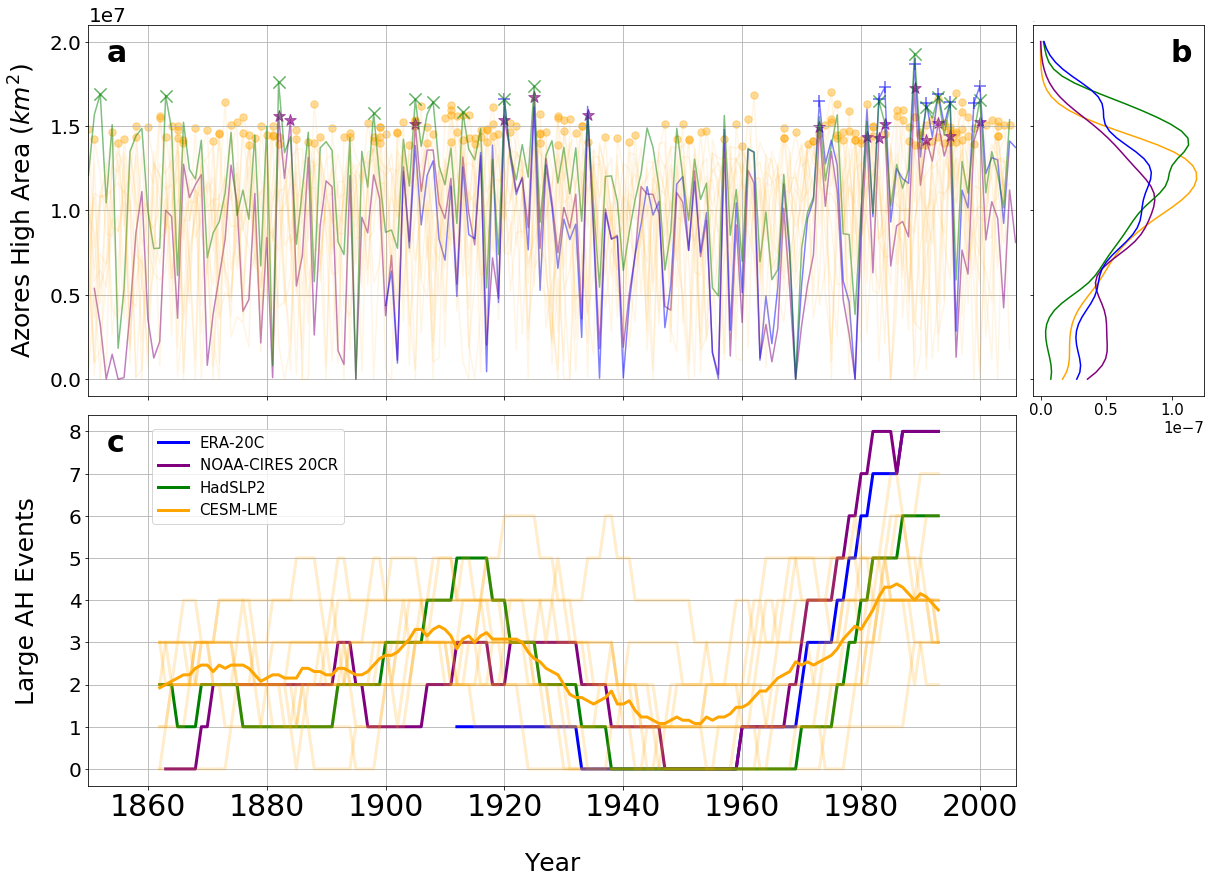

In [14]:
fig = plt.figure(figsize=(20,14))
ax_ts=fig.add_subplot(2,6,(1,5))
add_subplot_index(ax_ts,'a',y=.9,x=.02)
ax_kde = fig.add_subplot(2,6,6,sharey=ax_ts)
add_subplot_index(ax_kde,'b',y=.9,x=.8)
ax_x = fig.add_subplot(2,6,(7,11),sharex=ax_ts)
add_subplot_index(ax_x,'c',y=.9,x=.02)

########################################      Time series axis        #####################################################

#plot aha 
im_ncr = ax_ts.plot(time_ncr[:-8],
                    ncr_aha[:-8],
                    label='NOAA-CIRES 20CR', color='purple',alpha=.5)
im_era = ax_ts.plot(time_era[:-4],
                    era_aha[:-4],
                    label='ERA 20C', color='blue',alpha=.5)
im_hc2 = ax_ts.plot(time_hc2[:-2],
                    hc2_aha[:-2],
                    label='HadSLP2', color='green',alpha=.5)

for i in range(0,13):
    ax_ts.plot(time_lme,
                   lme_aha[i,:],
                   color='orange',alpha=.1, label='CESM-LME')
    
    highest,where_highest = get_extremes(series=lme_aha[i,:], percent=percent,top=True);
    ax_ts.scatter(where_highest+1850,highest,color='orange',marker='o',alpha=.4,s=55);
    
#Plot markers at extreme events
highest_ncr,where_highest_ncr = get_extremes(series=ncr_aha[:-8], percent=percent,top=True);
ax_ts.scatter(where_highest_ncr+1851,highest_ncr,color='purple',marker='*',alpha=.6,s=150);

highest_era,where_highest_era = get_extremes(series=era_aha[:-4], percent=percent,top=True);
ax_ts.scatter(where_highest_era+1900,highest_era,color='blue',marker='+',alpha=.6,s=150);

highest_hc2,where_highest_hc2 = get_extremes(series=hc2_aha[:-2], percent=percent,top=True);
ax_ts.scatter(where_highest_hc2+1850,highest_hc2,color='green',marker='x',alpha=.6,s=150);

#set ticks and labels
ax_ts.set_ylabel('Azores High Area ($km^2$)',fontsize=25,labelpad=10)
ax_ts.set_xlim(1850,2006)
ax_ts.set_yticks(ax_ts.get_yticks()[1:][::2])
ax_ts.tick_params(labelsize=20,labelbottom=False)
ax_ts.yaxis.offsetText.set_fontsize(20)
ax_ts.grid()


############################################        KDE Plot axis        ##################################################

data = lme_aha.flatten()
xs = np.linspace(0,2)*1e7
ax_kde.plot(get_kde(data=lme_aha.flatten())(xs),xs,color='orange',label='CESM-LME')
# ax_kde.plot(get_kde(data=ncr_aha[:-8])(xs),xs,color='purple',label='NOAA-CIRES 20CR')
ax_kde.plot(get_kde(data=ncr_aha[:-4])(xs),xs,color='purple',label='NOAA-CIRES 20CR')
ax_kde.plot(get_kde(data=hc2_aha[:-2])(xs),xs,'green',label='HadSLP2')
ax_kde.plot(get_kde(data=era_aha)(xs),xs,'blue',label='ERA-20C')

#set ticks and labels
ax_kde.tick_params(labelsize=15,labelleft=False)
ax_kde.yaxis.offsetText.set_fontsize(0)
ax_kde.xaxis.offsetText.set_fontsize(15)


############################################      Extreme event axis     ##################################################


#create extreme large event frequency plot
#customization parameters 
show_members = True
shade_std    = False

ax_x.plot(time_era[:-17],running_bin_big_era[:-17],color='blue',label='ERA-20C',linewidth=3)
ax_x.plot(time_ncr[:-21],running_bin_big_ncr[:-21],color='purple',label='NOAA-CIRES 20CR',linewidth=3,)
ax_x.plot(time_hc2[:-14],running_bin_big_hc2[:-14],color='green',label='HadSLP2',linewidth=3,)

ax_x.plot(time_lme,running_bin_big_lme.mean(axis=0),color='orange',label='CESM-LME',linewidth=3)

if show_members == True:
    for i in range(0,13):
        ax_x.plot(time_lme,running_bin_big_lme[i,:],color='orange',linewidth=3,alpha=.2);
if shade_std == True:
    ax_x.fill_between(time_lme,
                      running_bin_big_lme.mean(axis=0)-running_bin_big_lme.std(axis=0),
                      running_bin_big_lme.mean(axis=0)+running_bin_big_lme.std(axis=0),
                      color='orange', alpha=.1)

#adjust ticks and labels 
ax_x.grid()
ax_x.tick_params(labelsize=20)
ax_x.set_xticklabels(ax_x.get_xticks().astype(int),fontsize=30)
ax_x.set_ylabel('Large AH Events',fontsize=25,labelpad=30)
ax_x.set_xlabel('Year',fontsize=25,labelpad=30)

#legend
ax_x.legend(loc='upper left', bbox_to_anchor=(0.06, 0.98),fontsize=15)

#Final touchups 
fig.subplots_adjust(wspace=.1,hspace=.05)

#save figure as pdf 
# plt.savefig('/home/ncresswell/Desktop/AzoresHigh_Nature/figure_files/revised/20thCenturyAH_REVISED_2022-05-01.pdf',dpi=360)

In [6]:
print('The last 25 years available in all records had: '+
str(np.mean([running_bin_big_lme.mean(axis=0)[155-12],
         running_bin_big_era[105-12],
         running_bin_big_ncr[154-12],
         running_bin_big_hc2[155-12]],
        axis=0))
+' extreme events')

print('Over all 25-year periods available in all datasets, there were an average of '+
     str(np.nanmean([running_bin_big_lme.mean(axis=0)[50:],
            running_bin_big_era[:-5],
            running_bin_big_ncr[49:-9],
            running_bin_big_hc2[50:-2]]))+
     ' extreme events')

The last 25 years available in all records had: 6.4423076923076925 extreme events
Over all 25-year periods available in all datasets, there were an average of 2.5765182186234816 extreme events


In [1]:
%run AzoresHighProjectImports.py
%run /home/ncresswell/AzoresHighExpansion/MyFunctions/DataAnalyzing.py
%run /home/ncresswell/AzoresHighExpansion/MyFunctions/DataProcessing.py
%run /home/ncresswell/AzoresHighExpansion/MyFunctions/Plotting.py

In [3]:
#draw distribution curves
def get_kde(data=None,lam = .25):
    density = gaussian_kde(data)
    density.covariance_factor = lambda : lam
    density._compute_covariance()
    return density

def add_subplot_index(ax,index='a',y=.8,x=.03):
    ax.text(x=x,y=y,
            s=index,
            fontsize=30,
            transform=ax.transAxes,fontweight='bold')

"""
This function will plot frequency of extreme events as reported by ERA-20C pressure data over a defined window 

USAGE: to use pass an index that is defined through time, and specify what the threshold is for extreme event using the
      'percent' perameter. 

"""

def running_bin_extremes(index=None, percent=20, window=11, time=np.arange(1850,2006), label_large = '',label_small = '',title = '',legend_loc=2, index_has_nan=False,ylim=None):

    running_bin_big   = np.zeros(index.shape)
    running_bin_small = np.zeros(index_shape)
    
    running_bin_big, running_bin_small = get_bin_timeseries(index=index, percent=percent, window=window)
        
    fig, ax = plt.subplots(figsize=(20,10))

    ax.plot(time,running_bin_big,color='red',linewidth=3,alpha=2,label=label_large);
    ax.plot(time,running_bin_small,color='blue',linewidth=3,alpha=10,label=label_small);
   
    #Alter Ticks and labels
    ax.set_xticklabels(ax.get_xticks().astype(int),fontsize=20)
    ax.set_yticklabels(ax.get_yticks().astype(int),fontsize=20)
    ax.set_ylabel('Number of Extreme Events',fontsize=25)
    
    ax.legend(fontsize=30,loc=legend_loc);
    ax.set_title(title,fontsize=35);
    
    return fig,ax

"""
This function offers the same functionality of the running_bin_extremes_era data but is altered to account for the CESM_LME
meaning it assumed the first dimension of the data is ensemble member number. 

usage: pass index defined along ensemble member and time. observe the default parameters used in the calculation and
       rendering of the plot and change if desired 
"""

def running_bin_extremes_lme(index=None, percent=20, window=11, label_large = '',label_small = '',title = '',legend_loc=2, index_has_nan=False,ylim=None):

    #initialize containers for running bin diagnostic 
    running_bin_big   = np.zeros(index.shape)
    running_bin_small = np.zeros(index.shape)
    
    #iterate through ensemble members
    for e_mem in range(0,13):

        running_bin_big[e_mem,:],running_bin_small[e_mem,:] = get_bin_timeseries(index=index[e_mem,:], 
                                                                                 percent=percent, window=window)

    fig, ax = plt.subplots(figsize=(20,10))
        
    ax.plot(time,running_bin_big.mean(axis=0),color='red',linewidth=3,alpha=2,label=label_large);
    ax.plot(time,running_bin_small.mean(axis=0),color='blue',linewidth=3,alpha=10,label=label_small);
   
    #Alter Ticks and labels
    ax.set_xticklabels(ax.get_xticks().astype(int),fontsize=20)
    ax.set_yticklabels(ax.get_yticks().astype(int),fontsize=20)
    ax.set_ylabel('Number of Extreme Events',fontsize=25)
    
    ax.legend(fontsize=30,loc=legend_loc);
    ax.set_title(title,fontsize=35);
    
    return fig,ax

def get_bin_timeseries(index=None, percent=20, window=11):
    
    running_bin_big   = np.zeros(index.shape)
    running_bin_small = np.zeros(index.shape)
    
    #get list of extreme years
    _,where_largest  = get_extremes(series=index,percent=percent,top=True)
    _,where_smallest = get_extremes(series=index,percent=percent,bot=True)
    
    running_bin_big,_  = extremes_per_window(date_range=np.arange(0,index.size), \
                                                      dates_of_extremes=where_largest, \
                                                      window=window);
    running_bin_small,_= extremes_per_window(date_range=np.arange(0,index.size), \
                                                      dates_of_extremes=where_smallest, \
                                                      window=window);
    
    return running_bin_big, running_bin_small
"""

This monte carlo test for frequency will help decide whether the frequency of an event in one sample is significantly
    different to other samples 
    
USAGE: This function will use random sampling to determine the liklihood of extreme event frequency.

        if using without consideration of autocorrelation: 
        
            specify the iterations (the more the merrier) with "n_iterations";
            identify the sample size- because the sampling draws from all model runs, multiply the timespan by the 
                number of ensemble members (13);
            the bool array should be a flattened array describing at each timestep, in each ensemble member whether 
                an extreme event occured;
        
        if considering auto correlation:
            
            specify the iterations (the more the merrier) with "n_iterations";
            identify the sample size- this is where consideration of autocorrelation differs from the first method-
                here you just identify the timespan that is to be sampled from each ensemble member;
            bool array is also different when considering autocorelation- calculate extremes independantly for each 
                ensemble member and pass the bool array as an unflattened 13 by 1156 array.           

RETURNS: Given a confidence level, this will return the lower and upper threshold for confidence. The lower threshold 
        is the number of extremes in a given sample that would qualify as significantly low. THe uppwer threshold in 
        is the number of extremes in a given sample that would qualify as significanly high. 
       
"""

def monte_carlo_frequency(n_iterations, sample_size, bool_array, auto=None):
        
    #initialize array to hold the number of events occuring in each sample 
    n_true = np.empty([n_iterations])
    
    if auto == False:
        for i in range(0,n_iterations):

            #sampling 'sample_size' items from bool array, we record the number of time the conditon in question 
            #is satisfied
            n_true[i] = np.where(np.random.choice(bool_array,sample_size,replace=False))[0].size

        return n_true
    
    else: 
        if bool_array.shape[0] != 13:
            print('not viable bool array. please read the "USAGE" section in the function definiton.')
            
        for i in range(0,n_iterations):
            
            n_true_temp = np.empty([13,sample_size])
            
            for j in range(0,13):
                
                start = np.random.choice(np.arange(0,bool_array.shape[1]-sample_size),1)[0]
                
                n_true_temp[j,:] = bool_array[j,start:start+sample_size]
                
            n_true[i]=np.where(n_true_temp.flatten())[0].size
        
        return n_true

    
    
    
def monte_carlo_variance(n_iterations, sample_size, index_array, auto_corr=None):
        
    #initialize array to hold the variance in each sample 
    variance = np.empty([n_iterations])
    
    if auto_corr == False:
        for i in range(0,n_iterations):

            #sampling 'sample_size' items from index array
            variance[i] = np.nanvar(np.random.choice(index_array,sample_size,replace=False))

        return variance
    
    else: 
        if index_array.shape[0] != 13:
            print('not viable bool array. please read the "USAGE" section in the function definiton.')
            
        for i in range(0,n_iterations):
            
            samples_temp = np.empty([13,sample_size])
            
            for j in range(0,13):
                
                start = np.random.choice(np.arange(0,index_array.shape[1]-sample_size),1)[0]
                
                samples_temp[j,:] = index_array[j,start:start+sample_size]
                
            variance[i]=np.nanvar(samples_temp.flatten())
        
        return variance
            
def get_aha(filename, lon_name='lon',lat_name='lat',var_name='psl',lat_range=[10,52],lon_range=[-60,10],threshold=1021,conversion_factor=1/100,mf_dataset = False,return_psl=True):
    
    #load data
    if mf_dataset:
        psl = xr.open_mfdataset(filename,
                                decode_times=False,
                                decode_cf=False,
                                concat_dim='time')[var_name]
    else:
        psl = xr.open_dataset(filename)[var_name]
    #get seasonal average DJF, also center longitude
    psl_djf,centered_lon = fix_lon(seasonal_averages(psl.values,
                                                     season='DJF')*conversion_factor,
                                   psl[lon_name].values)
    #calculate AHA diagnostic
    ah = filter_lat_lon(data_unfiltered=filter_tresh(data_unfiltered=psl_djf,
                                                     below=True,
                                                     threshold=threshold),
                        lat=psl[lat_name].values,
                        lat_range=lat_range,
                        lon=centered_lon,
                        lon_range=lon_range)
    #find AHA
    aha = get_area_of_filtered_data(ah,lat=psl[lat_name].values,
                                    lon=centered_lon)
    if return_psl:
        return aha, psl_djf, centered_lon
    else:
        return aha  
    